In [17]:
from prophet import Prophet
import pandas as pd

In [2]:
import codecs
with codecs.open("./data/nikkei_stock_average_monthly_jp.csv", "r", "Shift-JIS", "ignore") as file:
    df = pd.read_table(file, delimiter=",")
df.head()

,データ日付,終値,始値,高値,安値
0,2000/01/01,19539.70,19002.86,19539.70,18168.27
1,2000/02/01,19959.52,19423.38,20007.77,19367.83
2,2000/03/01,20337.32,20081.67,20706.65,19078.60
3,2000/04/01,17973.70,20726.99,20833.21,17973.70
4,2000/05/01,16332.45,18403.08,18439.36,16008.14


In [3]:
df = df.rename(columns={"データ日付":"date", "終値":"closing_price", "始値":"open_price", "高値":"higher_price", "安値":"lower_price"})
df = df[:-1]
print(len(df))
df.head()

267


,date,closing_price,open_price,higher_price,lower_price
0,2000/01/01,19539.70,19002.86,19539.70,18168.27
1,2000/02/01,19959.52,19423.38,20007.77,19367.83
2,2000/03/01,20337.32,20081.67,20706.65,19078.60
3,2000/04/01,17973.70,20726.99,20833.21,17973.70
4,2000/05/01,16332.45,18403.08,18439.36,16008.14


In [4]:
#日付の処理
df["date"] = pd.to_datetime(df["date"])
df.head()

,date,closing_price,open_price,higher_price,lower_price
0,2000-01-01,19539.70,19002.86,19539.70,18168.27
1,2000-02-01,19959.52,19423.38,20007.77,19367.83
2,2000-03-01,20337.32,20081.67,20706.65,19078.60
3,2000-04-01,17973.70,20726.99,20833.21,17973.70
4,2000-05-01,16332.45,18403.08,18439.36,16008.14


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

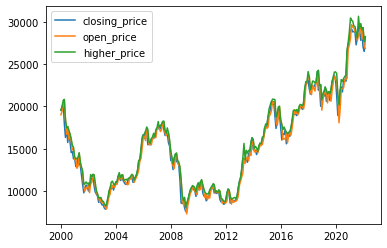

In [6]:
t = df.date
for i in range(1,4):
    y = df.iloc[:, i]
    plt.plot(t,y, label=df.columns[i])
plt.legend()
plt.show()

In [7]:
#予測
m = Prophet(seasonality_mode="multiplicative")
df_closing = df[["date", "closing_price"]].rename(columns={"date":"ds", "closing_price":"y"})
m.fit(df_closing)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -15.7648


/Users/harusaku/Desktop/HaitLab/Stock_price_prediction_app/.env/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       490.018    0.00702188       82.8067     0.06965           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     102       490.241    0.00540039       84.8837   6.108e-05       0.001      182  LS failed, Hessian reset 
     158       490.692    0.00036046       72.1399    3.93e-06       0.001      293  LS failed, Hessian reset 
     199       490.711   2.40917e-05       80.6129           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       491.415   0.000209456       78.9012           1           1      483   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     311       491.441   8.52599e-05       75.6972   1.264e-06       0.001      536  LS failed, Hessian reset 
     399       491.509   5.09802e-05  

In [8]:
future = m.make_future_dataframe(periods=120, freq="MS")
future.tail()

,ds
382,2031-11-01
383,2031-12-01
384,2032-01-01
385,2032-02-01
386,2032-03-01


In [9]:
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

/Users/harusaku/Desktop/HaitLab/Stock_price_prediction_app/.env/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/harusaku/Desktop/HaitLab/Stock_price_prediction_app/.env/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
382,2031-11-01,43344.796925,39003.491612,47517.413479
383,2031-12-01,43564.239440,39277.917434,47606.325045
384,2032-01-01,43554.092052,39287.107626,47509.510610
385,2032-02-01,42951.945255,38701.860722,47158.277181
386,2032-03-01,43191.134081,39013.909277,47245.499327


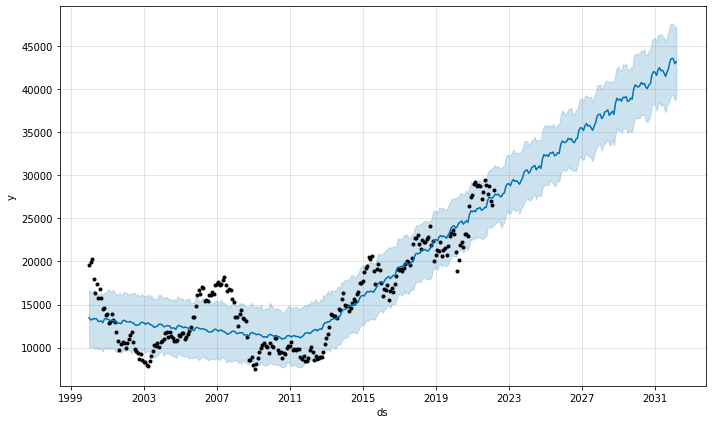

In [10]:
fig1 = m.plot(forecast)

/Users/harusaku/Desktop/HaitLab/Stock_price_prediction_app/.env/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


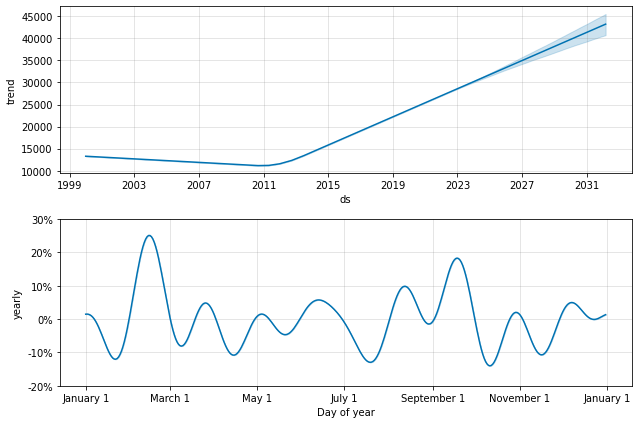

In [11]:
fig2 = m.plot_components(forecast)

In [13]:
import pandas as pd
import pandas_datareader.data as web

In [18]:
df = web.DataReader("9020.T", data_source="yahoo", start="2000-01-01")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-04,5520.0,5480.0,5510.0,5510.0,2000.0,4052.730225
2000-01-05,5590.0,5480.0,5500.0,5590.0,2700.0,4111.573242
2000-01-06,5690.0,5500.0,5690.0,5500.0,2700.0,4045.375000
2000-01-07,5520.0,5450.0,5500.0,5510.0,4800.0,4052.730225
2000-01-10,5510.0,5510.0,5510.0,5510.0,0.0,4052.730225


In [24]:
df.shape
df.reset_index(inplace=True)
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [30]:
df_predict = df[["Date", "Adj Close"]].rename(columns={"Date":"ds", "Adj Close":"y"})
df_predict.head()

,ds,y
0,2000-01-04,4052.730225
1,2000-01-05,4111.573242
2,2000-01-06,4045.375000
3,2000-01-07,4052.730225
4,2000-01-10,4052.730225


In [31]:
m = Prophet()
m.fit(df_predict)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/harusaku/Desktop/HaitLab/Stock_price_prediction_app/.env/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -72.0738
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       12761.3     0.0330378       3781.18      0.7798      0.7798      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       13104.1     0.0799903       1895.83           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       13269.9    0.00799931       1014.33           1           1      341   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       13435.2    0.00790466       302.319      0.3366           1      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       13548.4     0.0746215          3799           1           1      561   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [38]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
5933,2023-03-28
5934,2023-03-29
5935,2023-03-30
5936,2023-03-31
5937,2023-04-01


In [39]:
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(10)

/Users/harusaku/Desktop/HaitLab/Stock_price_prediction_app/.env/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/harusaku/Desktop/HaitLab/Stock_price_prediction_app/.env/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
5928,2023-03-23,5797.426722,4698.585174,6862.303837
5929,2023-03-24,5794.131397,4716.201394,6957.031207
5930,2023-03-25,5805.958013,4762.454035,6859.744073
5931,2023-03-26,5806.889714,4723.232013,6894.944130
5932,2023-03-27,5793.056175,4703.316899,6853.338057
5933,2023-03-28,5807.291433,4728.443680,6896.360811
5934,2023-03-29,5805.862916,4791.968956,6987.159773
5935,2023-03-30,5803.033010,4767.344801,6940.558340
5936,2023-03-31,5799.004622,4754.309409,6874.782183
5937,2023-04-01,5810.033870,4756.206548,6914.617941


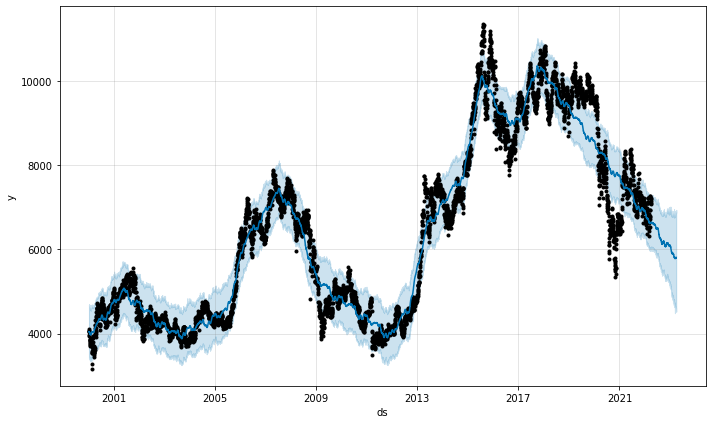

In [34]:
fig1 = m.plot(forecast)

/Users/harusaku/Desktop/HaitLab/Stock_price_prediction_app/.env/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/harusaku/Desktop/HaitLab/Stock_price_prediction_app/.env/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


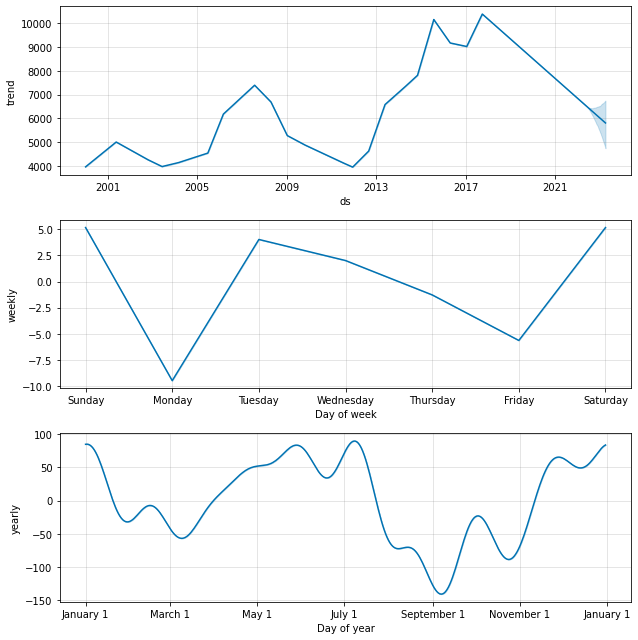

In [35]:
fig2 = m.plot_components(forecast)

In [109]:
df = pd.read_excel("../managing_app/templates/data_j.xlsx")
df = df[["コード","銘柄名","市場・商品区分", "33業種コード", "33業種区分"]]
df.head()

,コード,銘柄名,市場・商品区分,33業種コード,33業種区分
0,1301,極洋,市場第一部（内国株）,50,水産・農林業
1,1305,ダイワ上場投信－トピックス,ETF・ETN,-,-
2,1306,ＮＥＸＴ ＦＵＮＤＳ ＴＯＰＩＸ連動型上場投信,ETF・ETN,-,-
3,1308,上場インデックスファンドＴＯＰＩＸ,ETF・ETN,-,-
4,1309,ＮＥＸＴ ＦＵＮＤＳ ＣｈｉｎａＡＭＣ・中国株式・上証５０連動型上場投信,ETF・ETN,-,-


In [110]:
special = df[df["33業種コード"] == "-"]
special

,コード,銘柄名,市場・商品区分,33業種コード,33業種区分
1,1305,ダイワ上場投信－トピックス,ETF・ETN,-,-
2,1306,ＮＥＸＴ ＦＵＮＤＳ ＴＯＰＩＸ連動型上場投信,ETF・ETN,-,-
3,1308,上場インデックスファンドＴＯＰＩＸ,ETF・ETN,-,-
4,1309,ＮＥＸＴ ＦＵＮＤＳ ＣｈｉｎａＡＭＣ・中国株式・上証５０連動型上場投信,ETF・ETN,-,-
5,1311,ＮＥＸＴ ＦＵＮＤＳ ＴＯＰＩＸ Ｃｏｒｅ ３０連動型上場投信,ETF・ETN,-,-
...,...,...,...,...,...
3876,9283,日本再生可能エネルギーインフラ投資法人,REIT・ベンチャーファンド・カントリーファンド・インフラファンド,-,-
3877,9284,カナディアン・ソーラー・インフラ投資法人,REIT・ベンチャーファンド・カントリーファンド・インフラファンド,-,-
3878,9285,東京インフラ・エネルギー投資法人,REIT・ベンチャーファンド・カントリーファンド・インフラファンド,-,-
3879,9286,エネクス・インフラ投資法人,REIT・ベンチャーファンド・カントリーファンド・インフラファンド,-,-


In [111]:
igai33 = list(set(special["市場・商品区分"].tolist()))
igai33

['REIT・ベンチャーファンド・カントリーファンド・インフラファンド', '出資証券', 'ETF・ETN']

In [112]:
data = {}
for content in igai33:
    kind = special[special["市場・商品区分"]==content]
    data[content] = kind["銘柄名"].tolist()
    print(len(data[content]))
kind["銘柄名"]

68
2
282


1                             ダイワ上場投信－トピックス
2                   ＮＥＸＴ　ＦＵＮＤＳ　ＴＯＰＩＸ連動型上場投信
3                         上場インデックスファンドＴＯＰＩＸ
4      ＮＥＸＴ　ＦＵＮＤＳ　ＣｈｉｎａＡＭＣ・中国株式・上証５０連動型上場投信
5           ＮＥＸＴ　ＦＵＮＤＳ　ＴＯＰＩＸ　Ｃｏｒｅ　３０連動型上場投信
                       ...                 
762             ｉＦｒｅｅＥＴＦ　ＮＡＳＤＡＱ１００（為替ヘッジなし）
763             ｉＦｒｅｅＥＴＦ　ＮＡＳＤＡＱ１００（為替ヘッジあり）
764                 ｉＦｒｅｅＥＴＦ　ＮＡＳＤＡＱ１００インバース
765               上場インデックスファンド豪州国債（為替ヘッジあり）
766               上場インデックスファンド豪州国債（為替ヘッジなし）
Name: 銘柄名, Length: 282, dtype: object

In [113]:
data

{'REIT・ベンチャーファンド・カントリーファンド・インフラファンド': ['エスコンジャパンリート投資法人',
  'サンケイリアルエステート投資法人',
  'ＳＯＳｉＬＡ物流リート投資法人',
  '東海道リート投資法人',
  '日本アコモデーションファンド投資法人',
  '森ヒルズリート投資法人',
  '産業ファンド投資法人',
  'アドバンス・レジデンス投資法人',
  'ケネディクス・レジデンシャル・ネクスト投資法人',
  'アクティビア・プロパティーズ投資法人',
  'ＧＬＰ投資法人',
  'コンフォリア・レジデンシャル投資法人',
  '日本プロロジスリート投資法人',
  '星野リゾート・リート投資法人',
  'Ｏｎｅリート投資法人',
  'イオンリート投資法人',
  'ヒューリックリート投資法人',
  '日本リート投資法人',
  '積水ハウス・リート投資法人',
  'トーセイ・リート投資法人',
  'ケネディクス商業リート投資法人',
  'ヘルスケア＆メディカル投資法人',
  'サムティ・レジデンシャル投資法人',
  '野村不動産マスターファンド投資法人',
  'いちごホテルリート投資法人',
  'ラサールロジポート投資法人',
  'スターアジア不動産投資法人',
  'マリモ地方創生リート投資法人',
  '三井不動産ロジスティクスパーク投資法人',
  '大江戸温泉リート投資法人',
  '投資法人みらい',
  '森トラスト・ホテルリート投資法人',
  '三菱地所物流リート投資法人',
  'ＣＲＥロジスティクスファンド投資法人',
  'ザイマックス・リート投資法人',
  'タカラレーベン不動産投資法人',
  '伊藤忠アドバンス・ロジスティクス投資法人',
  '日本ビルファンド投資法人',
  'ジャパンリアルエステイト投資法人',
  '日本都市ファンド投資法人',
  'オリックス不動産投資法人',
  '日本プライムリアルティ投資法人',
  'ＮＴＴ都市開発リート投資法人',
  '東急リアル・エステート投資法人',
  'グローバル・ワン不動産投資法人',
  'ユナイテッド・アーバン投資法人',
  '森トラスト総合リート投資法人',
  'インヴィンシブル投資法人',
  '

In [101]:
import numpy as np
df2 = df.replace({"-": np.nan})

In [102]:
df_33 = df[(df["33業種コード"] != "-") & (df["33業種区分"] != "-")] 
df_33

,コード,銘柄名,市場・商品区分,33業種コード,33業種区分
0,1301,極洋,市場第一部（内国株）,50,水産・農林業
19,1332,日本水産,市場第一部（内国株）,50,水産・農林業
20,1333,マルハニチロ,市場第一部（内国株）,50,水産・農林業
26,1352,ホウスイ,市場第一部（内国株）,6050,卸売業
37,1375,雪国まいたけ,市場第一部（内国株）,50,水産・農林業
...,...,...,...,...,...
4175,9993,ヤマザワ,市場第一部（内国株）,6100,小売業
4176,9994,やまや,市場第一部（内国株）,6100,小売業
4177,9995,グローセル,市場第一部（内国株）,6050,卸売業
4178,9996,サトー商会,JASDAQ(スタンダード・内国株）,6050,卸売業


In [103]:
gyousyu33 = list(set(df_33["33業種区分"].tolist()))
gyousyu33

['海運業',
 'ゴム製品',
 '金属製品',
 '証券、商品先物取引業',
 '石油・石炭製品',
 '非鉄金属',
 '水産・農林業',
 '電気・ガス業',
 '電気機器',
 '輸送用機器',
 'ガラス・土石製品',
 '建設業',
 '倉庫・運輸関連業',
 '卸売業',
 '銀行業',
 'パルプ・紙',
 '鉱業',
 '小売業',
 '不動産業',
 '情報・通信業',
 '食料品',
 '繊維製品',
 'サービス業',
 '陸運業',
 '鉄鋼',
 'その他金融業',
 '保険業',
 '空運業',
 '化学',
 '精密機器',
 '機械',
 'その他製品',
 '医薬品']

In [104]:
for content in gyousyu33:
    kind = df_33[df_33["33業種区分"] == content]
    data[content] = kind["銘柄名"].tolist()
data

{'REIT・ベンチャーファンド・カントリーファンド・インフラファンド': ['エスコンジャパンリート投資法人',
  'サンケイリアルエステート投資法人',
  'ＳＯＳｉＬＡ物流リート投資法人',
  '東海道リート投資法人',
  '日本アコモデーションファンド投資法人',
  '森ヒルズリート投資法人',
  '産業ファンド投資法人',
  'アドバンス・レジデンス投資法人',
  'ケネディクス・レジデンシャル・ネクスト投資法人',
  'アクティビア・プロパティーズ投資法人',
  'ＧＬＰ投資法人',
  'コンフォリア・レジデンシャル投資法人',
  '日本プロロジスリート投資法人',
  '星野リゾート・リート投資法人',
  'Ｏｎｅリート投資法人',
  'イオンリート投資法人',
  'ヒューリックリート投資法人',
  '日本リート投資法人',
  '積水ハウス・リート投資法人',
  'トーセイ・リート投資法人',
  'ケネディクス商業リート投資法人',
  'ヘルスケア＆メディカル投資法人',
  'サムティ・レジデンシャル投資法人',
  '野村不動産マスターファンド投資法人',
  'いちごホテルリート投資法人',
  'ラサールロジポート投資法人',
  'スターアジア不動産投資法人',
  'マリモ地方創生リート投資法人',
  '三井不動産ロジスティクスパーク投資法人',
  '大江戸温泉リート投資法人',
  '投資法人みらい',
  '森トラスト・ホテルリート投資法人',
  '三菱地所物流リート投資法人',
  'ＣＲＥロジスティクスファンド投資法人',
  'ザイマックス・リート投資法人',
  'タカラレーベン不動産投資法人',
  '伊藤忠アドバンス・ロジスティクス投資法人',
  '日本ビルファンド投資法人',
  'ジャパンリアルエステイト投資法人',
  '日本都市ファンド投資法人',
  'オリックス不動産投資法人',
  '日本プライムリアルティ投資法人',
  'ＮＴＴ都市開発リート投資法人',
  '東急リアル・エステート投資法人',
  'グローバル・ワン不動産投資法人',
  'ユナイテッド・アーバン投資法人',
  '森トラスト総合リート投資法人',
  'インヴィンシブル投資法人',
  '

In [105]:
print(data.keys())

dict_keys(['REIT・ベンチャーファンド・カントリーファンド・インフラファンド', '出資証券', 'ETF・ETN', '海運業', 'ゴム製品', '金属製品', '証券、商品先物取引業', '石油・石炭製品', '非鉄金属', '水産・農林業', '電気・ガス業', '電気機器', '輸送用機器', 'ガラス・土石製品', '建設業', '倉庫・運輸関連業', '卸売業', '銀行業', 'パルプ・紙', '鉱業', '小売業', '不動産業', '情報・通信業', '食料品', '繊維製品', 'サービス業', '陸運業', '鉄鋼', 'その他金融業', '保険業', '空運業', '化学', '精密機器', '機械', 'その他製品', '医薬品'])


In [107]:
# データの受け取り先は改訂予定
df = pd.read_excel("../managing_app/templates/data_j.xlsx")
df = df[["コード","銘柄名","市場・商品区分", "33業種コード", "33業種区分"]]

#33業種以外の物を抽出
special = df[df["33業種コード"] == "-"]

#33業種以外の銘柄名をリスト化
igai33 = list(set(special["市場・商品区分"].tolist()))

#業種ごとに銘柄を辞書でまとめる1
data = {}
for content in igai33:
    kind = special[special["33業種区分"] == content]
    data[content] = kind["銘柄名"].tolist()

#33業種を抽出
df_33 = df[(df["33業種コード"] != "-") & (df["33業種区分"] != "-")] 

# 33業種をリスト化

gyousyu33 = list(set(df_33["33業種区分"].tolist()))

#業種ごとに銘柄を辞書でまとめる2
for content in gyousyu33:
    kind = df_33[df_33["33業種区分"] == content]
    data[content] = kind["銘柄名"].tolist()

gyousyu33.extend(igai33)

In [108]:
data

{'REIT・ベンチャーファンド・カントリーファンド・インフラファンド': [],
 '出資証券': [],
 'ETF・ETN': [],
 '海運業': ['日本郵船',
  '商船三井',
  '川崎汽船',
  'ＮＳユナイテッド海運',
  '明治海運',
  '飯野海運',
  '玉井商船',
  '共栄タンカー',
  '栗林商船',
  '東海汽船',
  '佐渡汽船',
  '川崎近海汽船',
  '乾汽船'],
 'ゴム製品': ['横浜ゴム',
  '昭和ホールディングス',
  '日東化工',
  'ＴＯＹＯ\u3000ＴＩＲＥ',
  'ブリヂストン',
  '住友ゴム工業',
  '藤倉コンポジット',
  'オカモト',
  '西川ゴム工業',
  '朝日ラバー',
  'ニチリン',
  'フコク',
  'ニッタ',
  '櫻護謨',
  '住友理工',
  '三ツ星ベルト',
  '相模ゴム工業',
  'バンドー化学',
  '不二ラテックス'],
 '金属製品': ['中央ビルト工業',
  '日本調理機',
  'ケー・エフ・シー',
  '稲葉製作所',
  '丸順',
  'エスイー',
  'アトムリビンテック',
  '宮地エンジニアリンググループ',
  'トーカロ',
  'アルファＣｏ',
  'サンコーテクノ',
  'ＳＵＭＣＯ',
  '特殊電極',
  '三ツ知',
  '日創プロニティ',
  '山王',
  '川田テクノロジーズ',
  '菊池製作所',
  'ＲＳ\u3000Ｔｅｃｈｎｏｌｏｇｉｅｓ',
  'ジェイテックコーポレーション',
  '信和',
  '清鋼材',
  'テクノフレックス',
  'サトウ産業',
  'ダイケン',
  '東洋製罐グループホールディングス',
  'ホッカンホールディングス',
  'シンポ',
  '日本製罐',
  'エムケー精工',
  'ＪＦＥコンテイナー',
  'コロナ',
  '横河ブリッジホールディングス',
  '駒井ハルテック',
  '瀧上工業',
  '川岸工業',
  '那須電機鉄工',
  '高田機工',
  'アルメタックス',
  '三和ホールディングス',
  '文化シヤッター',
  '三協立山',
  'アルインコ